In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate 
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('rental_data.csv', index_col =0)

In [14]:
data.head(10)

,name,houseID,houseZip,rentAmount,paymentDate_clean,dob_clean,paymentAmount_clean
0,Paulina Lefort,1869,92129,1324.0,2010-01-02,NaN,1324.0
1,Clare Tilly,407,92155,1723.0,2010-01-02,NaN,1723.0
2,Eleni Loudin,647,92111,1494.0,2010-01-02,2000-01-01,1494.0
3,Tandy Ammann,2215,92153,1438.0,2010-01-02,1992-12-02,1438.0
4,Tamra Trisler,2213,92172,1658.0,2010-01-02,2000-01-01,1658.0
5,Nga Drumm,1779,92117,1542.0,2010-01-02,NaN,1542.0
6,Valeria Banerjee,2353,92137,1586.0,2010-01-02,2000-01-01,1586.0
7,Elly Escamilla,668,92126,1994.0,2010-01-02,1970-04-11,1994.0
8,Gigi Cyr,848,92184,1355.0,2010-01-02,2000-01-01,1355.0
9,Cassy Heuer,336,92196,1976.0,2010-01-02,NaN,1976.0


In [10]:
data[data['houseID']==1]

,name,houseID,houseZip,rentAmount,paymentDate_clean,dob_clean,paymentAmount_clean
12184,Aaron Huston,1,92194,1720.0,2010-02-01,2000-01-01,1720.0
13564,Aaron Huston,1,92194,1720.0,2010-03-01,2000-01-01,1720.0
14372,Aaron Huston,1,92194,1720.0,2010-04-01,2000-01-01,1720.0
15118,Aaron Huston,1,92194,1720.0,2010-05-01,2000-01-01,1720.0
15719,Aaron Huston,1,92194,1720.0,2010-06-01,2000-01-01,1720.0
16409,Aaron Huston,1,92194,1720.0,2010-07-01,2000-01-01,1720.0
16998,Aaron Huston,1,92194,1720.0,2010-08-01,2000-01-01,1720.0
18021,Aaron Huston,1,92194,1720.0,2010-10-01,2000-01-01,1720.0
18552,Aaron Huston,1,92194,1720.0,2010-11-01,2000-01-01,1720.0
18906,Aaron Huston,1,92194,1720.0,2010-12-01,2000-01-01,1720.0


In [17]:
data[data['rentAmount']>data['paymentAmount_clean']]

,name,houseID,houseZip,rentAmount,paymentDate_clean,dob_clean,paymentAmount_clean
36,Blanche Bugarin,220,92142,1603.0,2010-01-02,1991-09-03,-240.45
98,Alden Vandever,38,92124,1525.0,2010-01-02,2000-01-01,-228.75
485,Bradly Culler,235,92110,1226.0,2010-01-02,2000-01-01,-183.90
688,Rubie Mirarchi,2001,92135,1212.0,2010-01-02,1982-01-07,-181.80
1174,Melida Demaree,1657,92127,1384.0,2010-01-03,2000-01-01,-207.60
...,...,...,...,...,...,...,...
56335,Wilber Haymon,2419,92174,1381.0,2012-11-01,NaN,-207.15
56457,Gilda Hamilton,851,92145,1636.0,2012-11-08,2001-11-04,-245.40
56549,Risa Gallaway,1951,92174,2164.0,2012-12-05,2000-01-01,-324.60
56578,Walter Squillace,2402,92112,1536.0,2012-12-07,2000-01-01,-230.40


We need to check how many missing values are present in the dataset and if the percentage missing is low, then we can drop the missing values.

In [18]:
data.isnull().sum()

name                       0
houseID                    0
houseZip                   0
rentAmount                 0
paymentDate_clean          0
dob_clean              14725
paymentAmount_clean      528
dtype: int64

Assuming that the values given above are missing for individual data points, if we remove all the data points with missing data, our data set would be reduced by approximately 15K records. This means that there will be a ~26% reduction in the data set.

In [19]:
data = data.dropna(axis = 0)

As the next step, we need to look for any outliers present in the dataset which may affect our results. We do this with the help of the describe method.

In [20]:
data.describe()

,houseID,houseZip,rentAmount,paymentAmount_clean
count,41477.000000,41477.000000,41477.000000,41477.000000
mean,1244.264846,92148.049136,1507.189334,1512.080722
std,713.565129,29.332412,304.099645,359.583605
min,1.000000,92101.000000,428.000000,-348.000000
25%,619.000000,92122.000000,1310.000000,1316.000000
50%,1240.000000,92147.000000,1505.000000,1520.000000
75%,1875.000000,92172.000000,1726.000000,1743.000000
max,2475.000000,92199.000000,2647.000000,2861.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffd606db670>,
      dtype=object)

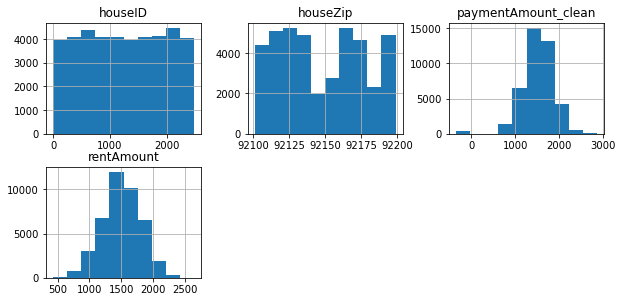

In [22]:
data.hist(figsize=(10, 10), layout=(4, 3))

To find the unique house IDs, I inserted all the IDs into a set to remove the duplicates and then using the len() function, we can see that the 56K records are for 1812 unique customers. Repeating the process again with the names, informs us that there are people who have lived in different houses in the dataset given.

In [33]:
unique_houses = set(data['houseID'])

In [34]:
len(unique_houses)

1812

In [35]:
unique_names = set(data['name'])

In [36]:
len(unique_names)

1474

In [ ]:
for name in unique_names:
    if 

In [40]:
data['year'] = pd.DatetimeIndex(data['paymentDate_clean']).year

In [41]:
data

,name,houseID,houseZip,rentAmount,paymentDate_clean,dob_clean,paymentAmount_clean,year
2,Eleni Loudin,647,92111,1494.0,2010-01-02,2000-01-01,1494.0,2010
3,Tandy Ammann,2215,92153,1438.0,2010-01-02,1992-12-02,1438.0,2010
4,Tamra Trisler,2213,92172,1658.0,2010-01-02,2000-01-01,1658.0,2010
6,Valeria Banerjee,2353,92137,1586.0,2010-01-02,2000-01-01,1586.0,2010
7,Elly Escamilla,668,92126,1994.0,2010-01-02,1970-04-11,1994.0,2010
...,...,...,...,...,...,...,...,...
56603,Jani Folger,1045,92159,1414.0,2012-12-09,2000-01-01,1555.0,2012
56604,Carmella Buchanan,312,92115,1362.0,2012-12-09,1996-09-12,1702.0,2012
56605,Kraig Lorusso,1279,92129,1338.0,2012-12-09,2000-01-01,1471.0,2012
56606,Ronna Messer,1967,92139,890.0,2012-12-09,2066-04-08,979.0,2012


In [ ]:
a = {}
l=[]
for name in unique_names:
    c=0
    d=0
    e=0
    for nameU in range(len(data['name'])):
        if data.iloc[nameU]['name']==name:
            if data.iloc[nameU]['year']==2010:
                c+=1
            if data.iloc[nameU]['year']==2011:
                d=d+1
            if data.iloc[nameU]['year']==2012:
                e=e+1
    a[name] = {2010:c,2011:d,2012:e}

In [64]:
data.iloc[0]['year']

2010

In [61]:
a

{'Sharonda Abril': {2010: 0, 2011: 0, 2012: 0},
 'Tara Chalk': {2010: 0, 2011: 0, 2012: 0},
 'Cletus Nitta': {2010: 0, 2011: 0, 2012: 0},
 'Merrilee Winegarden': {2010: 0, 2011: 0, 2012: 0},
 'Leonila Gillispie': {2010: 0, 2011: 0, 2012: 0},
 'Hilary Zucco': {2010: 0, 2011: 0, 2012: 0},
 'Justa Brumit': {2010: 0, 2011: 0, 2012: 0},
 'Merilyn Branscum': {2010: 0, 2011: 0, 2012: 0},
 'Li Houlihan': {2010: 0, 2011: 0, 2012: 0},
 'Greg Borgia': {2010: 0, 2011: 0, 2012: 0},
 'Marylyn Cardenas': {2010: 0, 2011: 0, 2012: 0},
 'Patty Perlman': {2010: 0, 2011: 0, 2012: 0},
 'Tamra Trisler': {2010: 0, 2011: 0, 2012: 0},
 'Kayla Moton': {2010: 0, 2011: 0, 2012: 0},
 'Margarette Neitzel': {2010: 0, 2011: 0, 2012: 0},
 'Giovanna Wakefield': {2010: 0, 2011: 0, 2012: 0},
 'Maribel Weigand': {2010: 0, 2011: 0, 2012: 0},
 'Corrin Mask': {2010: 0, 2011: 0, 2012: 0},
 'Maisha Furniss': {2010: 0, 2011: 0, 2012: 0},
 'Toshiko Sacco': {2010: 0, 2011: 0, 2012: 0},
 'Marleen Avera': {2010: 0, 2011: 0, 2012: 0

In [49]:
set(data['year'])

{2010, 2011, 2012}